<a href="https://colab.research.google.com/github/pierrebomfim/data_science/blob/master/Analisando_os_Dados_do_Airbnb_(ROMA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**

Pierre Bomfim

*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *ROMA*

<center><img alt="Analisando Airbnb" width="25%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>



O [Airbnb](https://www.airbnb.com.br/) é uma plataforma de aluguel de hospedagens e serviços de turismo, que permite que qualquer pessoa disponibilize ou reserve acomodações ao redor do mundo. Mesmo sem possuir **nenhum hotel**, ele já é considerado como a **maior empresa hoteleira da atualidade**.

Conectando viajantes e anfitriões, o Airbnb fornece uma plataforma inovadora para possibilitar uma experiência de hospedagem alternativa à oferecida pela rede hoteleira tradicional. 

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando o gigantesco mercado hoteleiro.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


---


**Neste *notebook*, seram analisados os dados referentes à cidade de Roma, e extrair insights a partir de dados brutos.**

<center><img alt="Analisando Airbnb" width="70%" src="https://cdn.pixabay.com/photo/2017/11/30/18/55/castel-santangelo-2989238_960_720.jpg" "Todos os caminhos levam a Roma"></center>

Roma é a capital da Itália e atualmente possui quase 3 milhões de habitantes, sendo a 3ª cidade mais populosa de toda a União Européia. Está localizada na porção centro-oeste do país e é banhada pelas margens do rio Tibre.

*A Cidade Eterna*, como é comumente conhecida, foi fundada por volta de 753 a.c e foi palco de grandes acontecimentos históricos. Foi sede do glorioso Império Romano, que perdurou por cinco séculos como o maior potência política e militar do planeta. 
Roma é a casa de grandes pensadores e intelectuais, no campo da filosofia, arte e ciências naturais. Após a queda do Império Romano, foi tomada pelo cristianismo, que fundou sobre as bases desta incrível cidade, o que hoje conhecemos como civilização ocidental. A Igreja Católica ali se estabeleceu e ainda hoje tem na cidade sua sede, mas precisamente na Cidade do Vaticano, uma pequena cidade-estado dentro dos muros de Roma.

Já se nota o grande potêncial turístico dessa cidade. Já na idade média, caravanas seguiam em peregrinação para a Roma, a cidade santa dos católicos. Atualmente, os peregrinos e turistas dividem espaço, em busca de história, cultura, conhecimento, direção espiritual e diversão nos arredores da cidade.

Sua estrutura turística conta com mais de 1600 hotéis, segundo o portal [estatista](https://www.statista.com/statistics/1092620/hotel-facilities-in-rome-by-hotel-rating/). Existe uma regulamentação do governo local para o setor, definindo taxas e medidas de controle. Desta forma, o Airbnb funciona de forma legal na cidade, bastando que o *anfitrião* (pessoa que oferece a hospedagem) cumpra os procedimentos exigidos pelas autoridades. Mais informações sobre o Airbnb em Roma pode ser encontrada neste [artigo](https://www.airbnb.com.br/help/article/1228/roma?_set_bev_on_new_domain=1665424247_NzY0NjEzMzE3YTQz) no site da própria plataforma.

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rome (good for visualisations).*

Este dataset poderá sofrer atualização. No momento, a ultima compilação foi realizada em 11 de Setembro de 2022 e pode ser acessada no link abaixo:

* [dataset]('http://data.insideairbnb.com/italy/lazio/rome/2022-09-11/visualisations/listings.csv)

In [4]:
# importar os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('/content/listings.csv')

## Análise dos Dados


In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

### **Dicionário das variáveis**

* `id`
* `name`
* `host_id`
* `host_name`
* `neighbourhood_group`
* `neighbourhood`
* `latitude`
* `longitude`
* `room_type`
* `price`
* `minimum_nights`
* `number_of_reviews`
* `last_review`
* `reviews_per_month`
* `calculated_host_listings_count`
* `availability_365`
* `number_of_reviews_ltm`
* `license`


Inicialmente, vamos fazer um *overview* do *dataset*, analisando as 5 primeiras entradas.

In [7]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,103870,CASACHICA Your holiday home in Rome,535822,Fabrizio,NaN,I Centro Storico,41.89711,12.50423,Entire home/apt,78,3,225,2022-08-25,1.64,1,319,30,NaN
1,17629440,ISOLA DEL CUORE,68534156,Cristina,NaN,VII San Giovanni/Cinecittà,41.78984,12.60899,Private room,45,1,213,2022-07-12,3.22,2,343,8,NaN
2,2737,"Elif's room in cozy, clean flat.",3047,Elif,NaN,VIII Appia Antica,41.87136,12.48215,Private room,50,7,7,2015-05-28,0.07,6,365,0,NaN
3,2903,Stay a night in Calisto6 B&B Rome,3280,Andrea,NaN,I Centro Storico,41.88824,12.46953,Private room,164,1,55,2017-10-31,0.33,3,318,0,NaN
4,3079,Cozy apartment (2-4)with Colisseum view,3504,Laura,NaN,I Centro Storico,41.89500,12.49117,Entire home/apt,90,3,21,2022-04-30,0.15,4,265,2,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [8]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\t {df.shape[0]}')
print(f'Variáveis:\t {df.shape[1]}\n')

# verificar os tipos das variáveis do dataset
print(df.dtypes)

Entradas:	 24782
Variáveis:	 18

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [9]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.846663
reviews_per_month                 0.150069
last_review                       0.150069
host_name                         0.000242
name                              0.000121
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

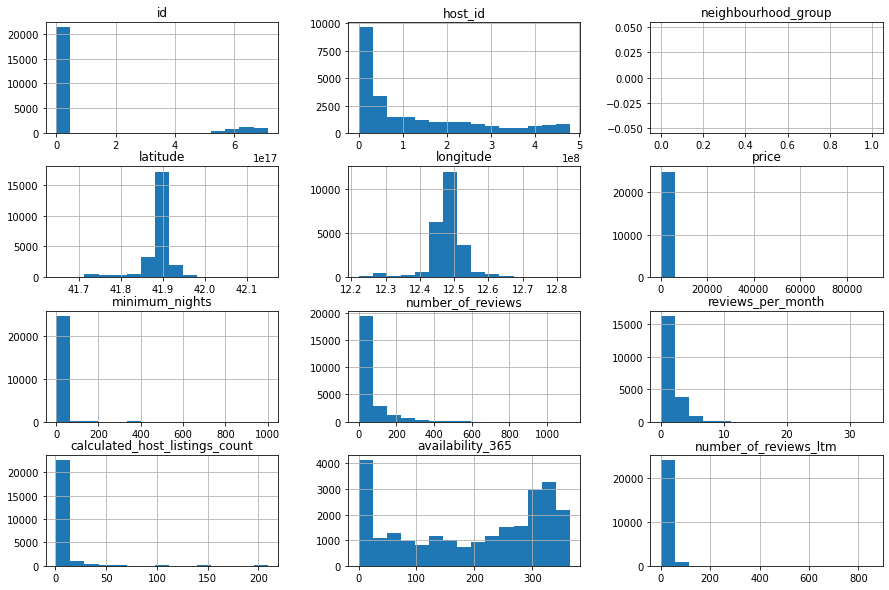

In [10]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15 , figsize=(15,10));

#### Tratando os **Outliers**

Pela aprensentação dos gráficos de distribuição, nota-se que existem variáveis com entradas com valores outliers, ou seja, que diferem completamente do restante do conjunto dos dados.
Para verificar, faremos um resumo de dados estatísticos e, em seguida, plotaremos o gráfico **boxplot**, que possibilita uma boa visualização dos outliers.
Para os fins desta análise, trabalharemos aqui somente as variáveis `price` e `minimum_nights`.

In [11]:
# Resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,24782.000000,24782.000000
mean,172.562545,3.663506
std,964.744912,19.230146
min,0.000000,1.000000
25%,70.000000,1.000000
50%,104.000000,2.000000
75%,165.000000,3.000000
max,91000.000000,1000.000000


A partir do resumo acima, podemos inferir que:
- Na variável `price` o valor máx é de 91000, muito maior do que 75% do valor de entrada, que é até 165;
- A variável `minimum_nights` possui valor máximo 1000, o que significaria muito mais de um ano de estadia.
Vejams os gráficos abaixo:

##### Boxplot para `price`

In [12]:
df.shape[0]

24782

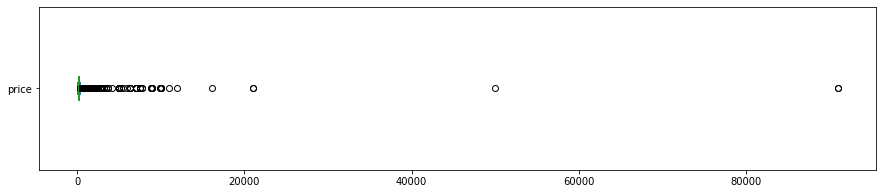

Valores acima de 1500 na variável price: 
580 entradas que correspondem à 
 2.34% do numero total de entradas.


In [13]:
# Boxplot price
df.price.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

# Definimos outliers valores acima de 600
print(f'Valores acima de 1500 na variável price: ')
print(f'{len(df[df.price > 600])} entradas que correspondem à ')
print(f'{((len(df[df.price > 600]) / df.shape[0])*100): .2f}% do numero total de entradas.')



##### Boxplot para `minimum_nights`

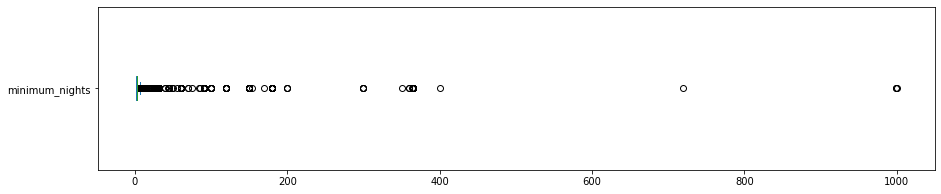

Valores acima de 30 na variável minimum_nights: 
186 entradas que correspondem à 
 0.75% do numero total de entradas.


In [14]:
# Boxplot minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

# Definimos outliers valores acima de 30
print(f'Valores acima de 30 na variável minimum_nights: ')
print(f'{len(df[df.minimum_nights > 30])} entradas que correspondem à ')
print(f'{((len(df[df.minimum_nights > 30]) / df.shape[0])*100): .2f}% do numero total de entradas.')

##### Remoção dos outliers e limpeza do dataframe

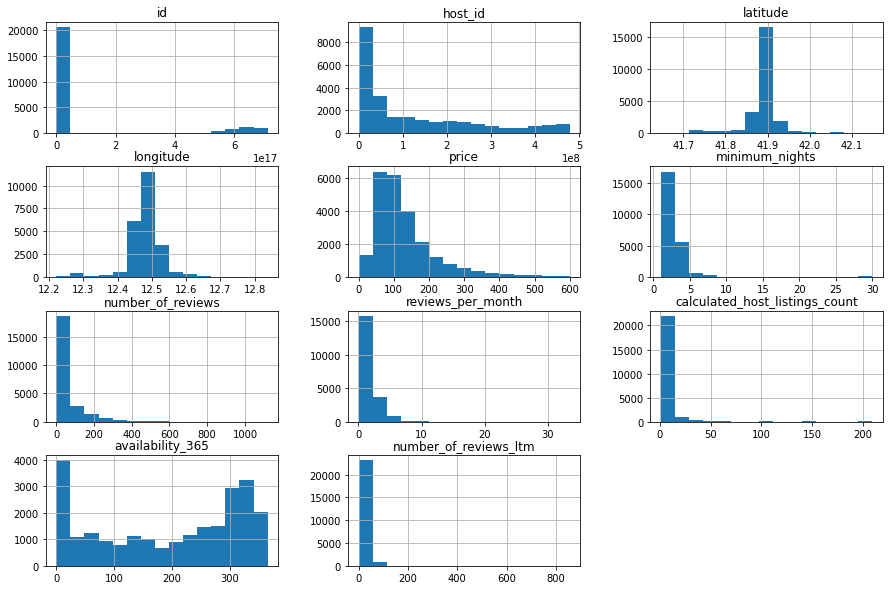

In [15]:
# Remoção de Outliers
df_new = df.copy()
df_new.drop(df_new[df_new.price > 600].index, axis=0, inplace=True)
df_new.drop(df_new[df_new.minimum_nights > 30].index, axis=0, inplace=True)

# Tratamento de valores ausentes:
df_new.drop('neighbourhood_group', axis=1, inplace=True)

# Plotagem de histagram 
df_new.hist(bins=15 , figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [16]:
# ver a média da coluna `price``
df_new.price.mean()

130.21394380853278

### **Q4. Qual a correlação existente entre as variáveis**

In [162]:
# criar uma matriz de correlação
corr = df_new[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.079946,-0.052974,0.006542,0.142787,0.154465
minimum_nights,-0.079946,1.000000,-0.037707,-0.103729,-0.053771,-0.048977
number_of_reviews,-0.052974,-0.037707,1.000000,0.528189,-0.047121,0.020478
reviews_per_month,0.006542,-0.103729,0.528189,1.000000,0.007292,0.085426
calculated_host_listings_count,0.142787,-0.053771,-0.047121,0.007292,1.000000,-0.045682
availability_365,0.154465,-0.048977,0.020478,0.085426,-0.045682,1.000000


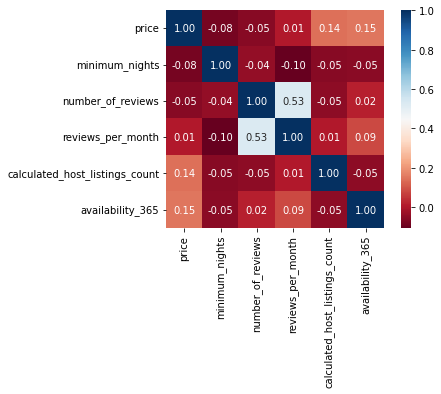

In [163]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

[16025, 7109, 756, 135]

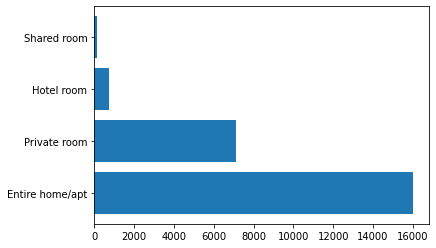

In [176]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_new.room_type.value_counts()

# Gráfico
width = []
for x in df_new.room_type.value_counts():
  width.append(x)
plt.barh(y=df_new.room_type.unique(), width=width);

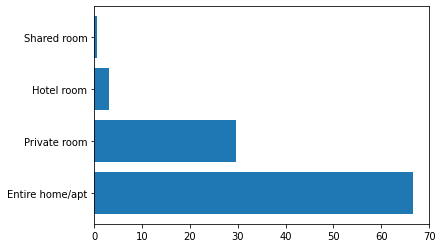

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
porc = (df_new.room_type.value_counts() / df_new.shape[0]) * 100

# Gráfico
width = []
for x in porc:
  width.append(x)
plt.barh(y=df_new.room_type.unique(), width=width);

['Hotel room', 'Entire home/apt', 'Private room', 'Shared room']

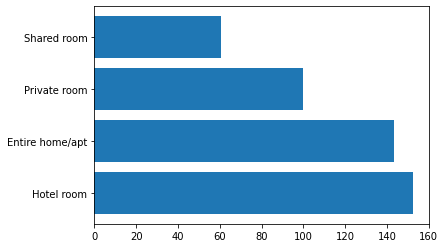

In [179]:
# Valores médios por tipo de hospedagem
price = df_new.groupby(['room_type']).price.mean().sort_values(ascending=False)

# Gráfico
kind = price.index.to_list()
plt.barh(y=kind, width=price);

### **Q6. Qual a localidade mais cara do dataset?**



In [54]:
# ver preços por bairros, na média
x = df_new.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

In [105]:
# Criar um dataframe com as informações acima: bairro x media de preço

#tranformar os dados em lista
price = x.to_list()
neighb = x.index.to_list()

# Juntar as duas listas em um dataframe
df_map = pd.DataFrame(list(zip(neighb,price)), columns = ['neighbourhood','price'])

Para plotar o mapa, utilizei o arquivo geojson com especificações dos bairros em Roma, disponibilizado pelo [Inside Airbnb](http://insideairbnb.com/get-the-data.html);

In [128]:
import json
import plotly.express as px

with open('/content/neighbourhoods.geojson') as file:
  loc = json.load(file)

fig = px.choropleth_mapbox(df_map, geojson=loc, 
                           locations='neighbourhood', 
                           featureidkey="properties.neighbourhood", 
                           color='price',
                           color_continuous_scale="Jet",
                           range_color=(0, 200),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 41.8502, "lon": 12.4929},
                           opacity=0.5,
                           labels={'neighb':'price'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Nota-se que, dentre os bairros forncedidos pelo dataset, o centro histórico é o que possui a média de preços mais alta, no valor de US 160, representado na cor vermelha no mapa.

In [ ]:
# plotar os imóveis pela latitude-longitude


No mapa abaixo, plotamos as hospedagens oferecidas, através da latitude x longitude disponibilizadas no dataset. Notamos que estão bem distribuídas pelo mapa. Ao passar o mouse pelo ponto, é fornecido o nome da hospedagem, valor da diária e o bairro.

In [145]:
fig = px.scatter_mapbox(df_new, lat="latitude", lon="longitude", 
                        hover_name="name", hover_data=["price", "neighbourhood"],
                        color='price', color_continuous_scale="Jet",
                        zoom=10, center = {"lat": 41.9100, "lon": 12.5500},
                        height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [161]:
# ver a média da coluna `minimum_nights`
print(f'A média do número mínimo de noite é {round(df_new.minimum_nights.mean())}.')
# ver a média da coluna `availability_365`
print(f'Os locais anunciados ficam, em média, {round(df_new.availability_365.mean())} dias por ano disponíveis para a estadia.')

A média do número mínimo de noite é 3.
Os locais anunciados ficam, em média, 193 dias por ano disponíveis para a estadia.


## Conclusões


Roma possui mais de 24 mil anúncios de hospedagem no Airbnb. Isso não significa que existem hospedagem em número igual, pois um anfitrião pode fazer diversos anúncios para a mesma hospedagem.

A localidade com o maior valor médio da diária é o centro histório, em torno de US 160. Devido à proximidade com os principais atrativos da cidade, o centro é mais disputado entre os turistas que visitam a cidade. O valor médio para toda a cidade é de US 130.

Mais de 60% das hospedagens alugadas são do tipo *casa/apartamento completos*. 30% são de quartos privativos e menos de 10% são de quartos de hoteis oferecidos na plataforma.

Com relação aos valores por tipo de hospedagem, vimos que os quartos de hotel são os mais caros, seguido por casa/aptos completos. Os mais baratos são os cômodos compartilhados.